In [ ]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd

%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
import seaborn as sns
import os
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro 
sns.set_theme()

$$\beta=\left[\frac{1}{2\sqrt{2}} \frac{(1-R) I_0(f)L_{eff}}{1+\left(\frac{d_s-f}{z_0(f)}\right)^{2}} \right]^{-1}\left[1-T(f,β;\{L, P_{av}, T_{p}, w_{l}, D, ds, C_f, \alpha, R\})\right]$$

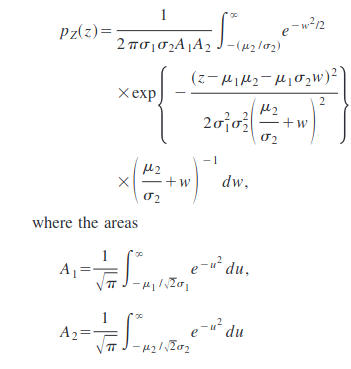
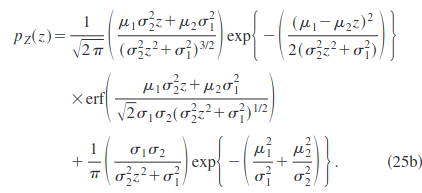

0


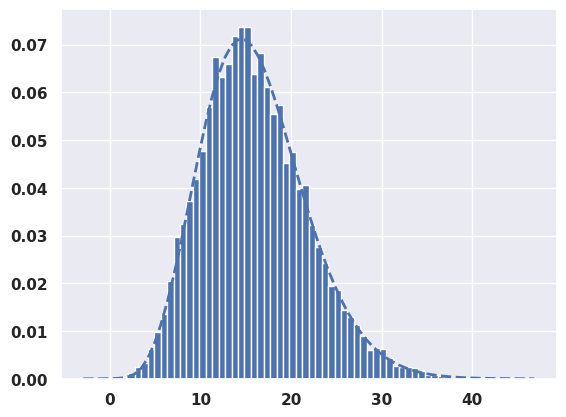

In [ ]:
import numpy as np
from scipy.integrate import quad


def confirm_gauss(s):
    result = (anderson(np.sort(s), dist='norm'))
    criterio=((result[0]<result[1][3])or(shapiro(np.sort(s))[1]>0.05))*1   
    return criterio
    

def prod(z,mu1,mu2,sigma1,sigma2):


    def AI(u):
        return np.exp(-u**2)
    
    A1=1/(np.sqrt(np.pi))*quad(AI,-mu1/(np.sqrt(2)*sigma1),np.Infinity)[0]
    A2=1/(np.sqrt(np.pi))*quad(AI,-mu2/(np.sqrt(2)*sigma2),np.Infinity)[0]

    def distr(w):
        return np.exp(-w**2/2)*np.exp(-(z-mu1*mu2-mu1*sigma2*w)**2/(2*sigma1**2*sigma2**2*(mu2/sigma2+w)**2))*(mu2/sigma2+w)**-1

    return 1/(2*np.pi*sigma1*sigma2*A1*A2)*quad(distr,-mu2/(np.sqrt(2)*sigma2),np.Infinity)[0]

def div(z,mu1,mu2,sigma1,sigma2):
    f1=1/(np.sqrt(2*np.pi))*(mu1*sigma2**2*z+mu2*sigma1)/(sigma2**2*z**2+sigma1**2)**(3/2)*np.exp(-((mu1-mu2*z)**2)/(2*(sigma2**2*z**2+sigma1**2)))


mu1=4
mu2=4
sigma1=1
sigma2=1
x=np.random.normal(mu1,sigma1,10000)
y=np.random.normal(mu2,sigma2,10000)
z=x*y
n, bins, patches=plt.hist(z,bins='fd',density=True)
k=np.linspace(min(bins),max(bins),len(bins))
distrib=[prod(i,mu1,mu2,sigma1,sigma2) for i in k]
l = plt.plot(k, distrib, 'b--', linewidth=2)

print(confirm_gauss(z))

In [29]:
bins

array([15.72592524, 22.89115371, 30.05638218, 37.22161064, 44.38683911,
       51.55206758, 58.71729605, 65.88252451, 73.04775298, 80.21298145,
       87.37820992])